<h2>PROJECT NO:3</h2>

<h1>CREDIT CARD FRAUD DETECTION</h1>

<ul><h4>Group Members:</h4><br>
    <li>Akshata Utekar</li>
    <li>Priya Khandagale</li>
    <li>Ganesh Sawant</li>
</ul>

<h2>WORKFLOW</h2>
<ol>
    <li>Credict Card Data</li>
    <li>Data Preprocessing</li>
    <li>Data Analysis</li>
    <li>Train test split</li>
    <li>Different Classification model-<b>Logistic Regression</b></li>
    <li>Model Evaluation</li>
</ol>

In [2]:
#Importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
#load the dataset
data = pd.read_csv(r'C:\Users\Priya K\Desktop\New folder\Projects\Credit Card fraud detection\creditcard.csv')

In [4]:
#top 5 rows of dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#last 5 rows 
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
#Dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.shape

(284807, 31)

In [8]:
#Number of missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<h3>We don't have any missing values so need of further preprocessing</h3>

In [9]:
#Distribution between legit and fradulent transaction
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<h3><ul><li>0 stands for legit transaction whereas 1 stands for Fradulent transaction.</li>
    <li>Dataset is highly imbalanced.</li></ul><h3>

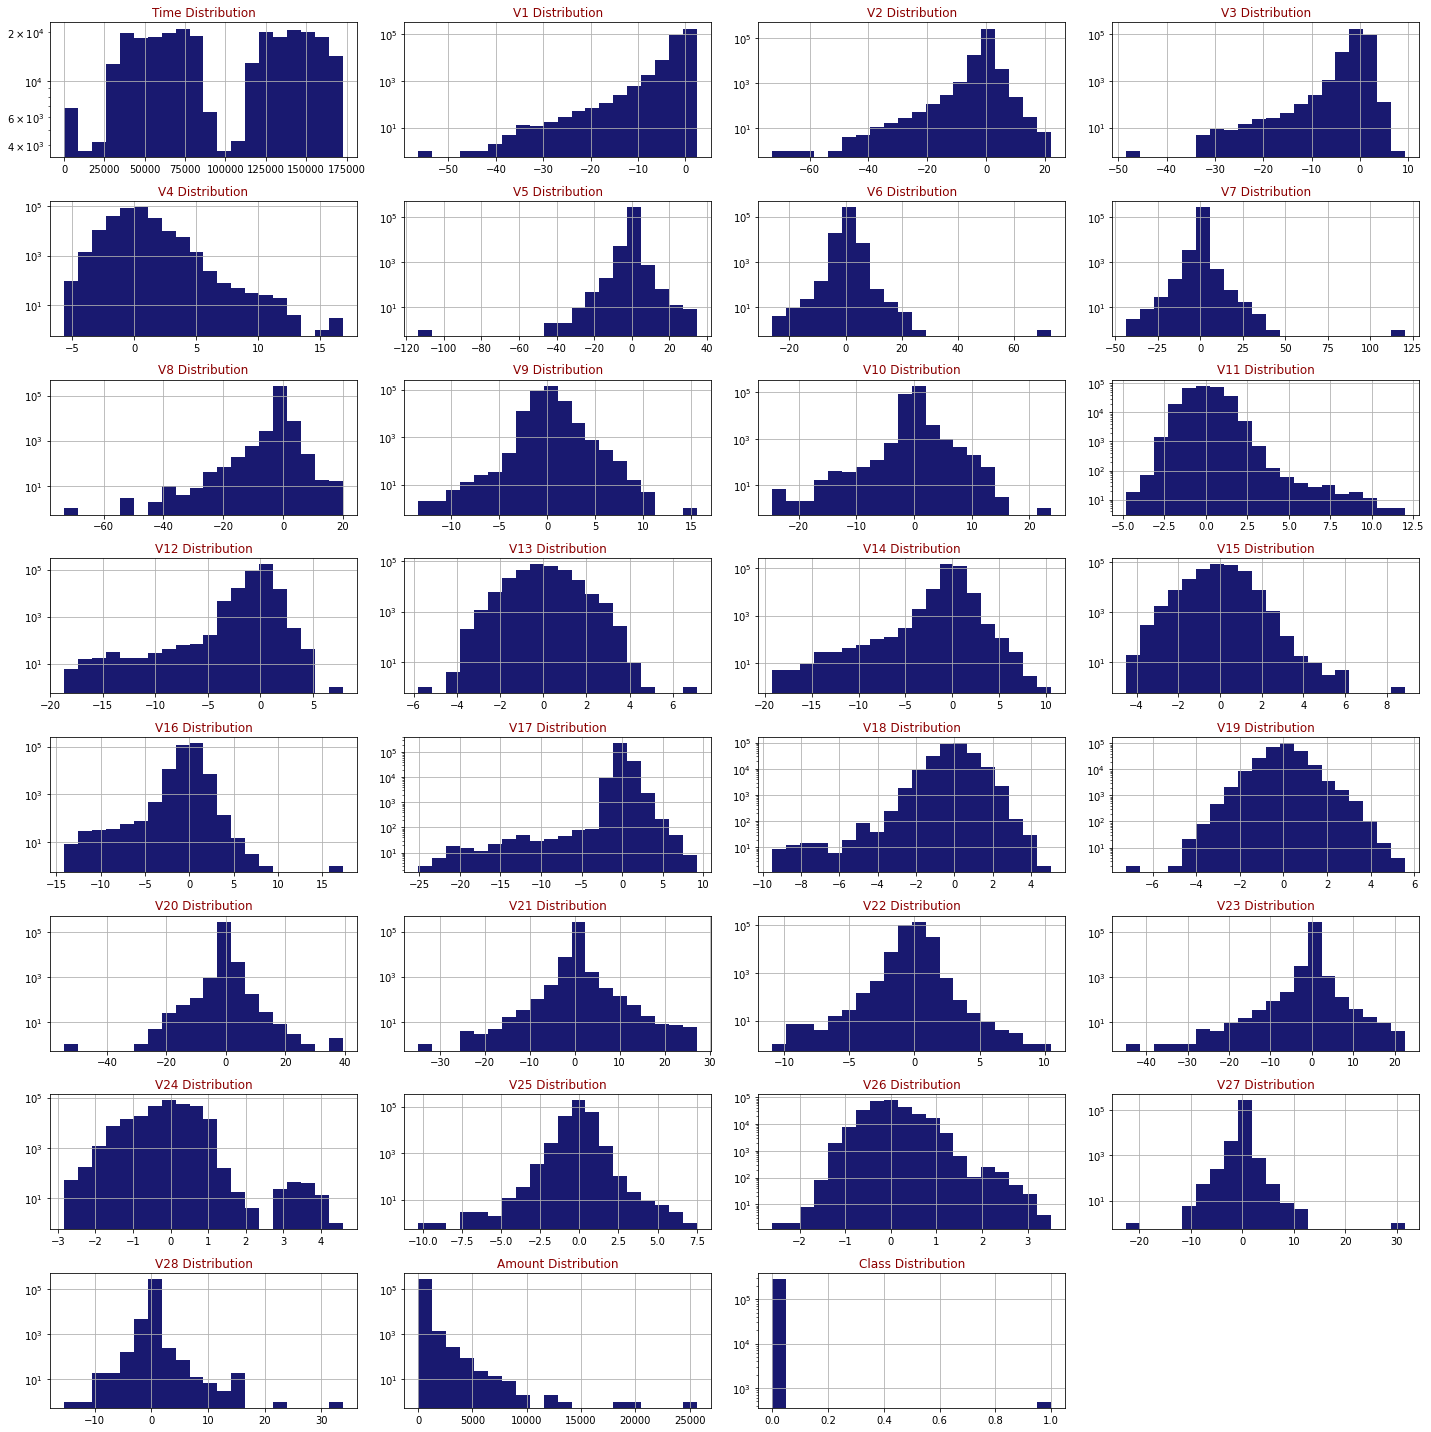

In [10]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(data,data.columns,8,4)


In [11]:
#separate data for analysis
legit = data[data.Class== 0]
fraud = data[data.Class== 1]

In [12]:
print("LEGIT=",legit.shape)
print("FRAUD=",fraud.shape)

LEGIT= (284315, 31)
FRAUD= (492, 31)


In [13]:
#statistical measures of legit data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
#statistical measures of fraud data
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

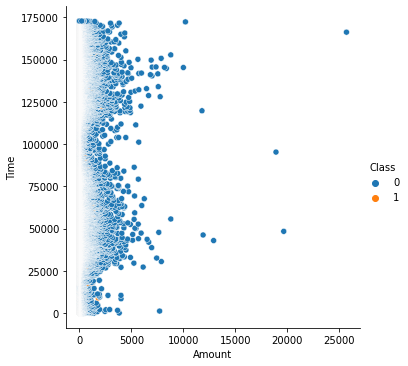

In [15]:
sns.relplot(x = 'Amount' , y='Time',hue = 'Class',data = data)

In [16]:
#compare the values for both transaction
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### UnderSampling - Deleting samples from the majority class.


#### Why Undersampling -> There is big difference between legit and fraud jobs

###  So the next step is Build a sample dataset containing similar distribution of normal(legit) transaction and fradulent transaction.


In [17]:
#random sampling 
legit_sample  = legit.sample(n=492)

### Concatenating two dataframes.

In [18]:
#axis = 0 because we want to concat the data row-wise.
new_dataset = pd.concat([legit_sample,fraud],axis = 0)

In [19]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
20033,30739.0,-1.516692,1.359533,1.102479,-1.562688,-0.370779,-0.489669,0.325017,0.286609,0.781617,...,-0.201215,-0.076724,0.047497,0.236326,-0.221037,0.687868,0.153858,-0.205734,3.69,0
250629,155001.0,0.066749,0.851164,-0.094893,-0.959827,1.092022,-0.110306,0.927960,-0.022168,-0.379057,...,-0.260552,-0.546238,-0.079138,-1.076986,-0.365491,0.186592,0.252082,0.078219,0.99,0
84746,60443.0,-1.851655,-1.001499,1.464520,0.836462,-0.462833,0.705960,-0.758816,0.795884,-0.858255,...,-0.392999,-1.101974,0.090330,-1.081306,0.421289,-0.166139,0.243235,-0.080974,166.90,0
277864,167904.0,-0.562748,1.216352,0.104099,-0.340137,0.123304,-0.974824,0.593843,0.212574,-0.302468,...,-0.237185,-0.696834,-0.002895,-0.110738,-0.141574,0.283554,-0.037945,0.010606,3.58,0
86479,61252.0,-2.486867,-1.964050,2.110183,0.421688,0.207300,-0.562067,-1.395387,-0.474059,0.803556,...,0.743753,-0.011480,-0.282822,0.181391,-0.205017,1.747088,0.430340,-0.101269,210.19,0


In [20]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [21]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

## The data is now balanced.

In [22]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94406.758130,-0.082147,0.071685,-0.050325,0.115482,0.015654,-0.052987,-0.010418,0.062611,0.001291,...,0.035213,0.040629,-0.013890,-0.006290,-0.01432,0.003715,-0.039734,0.017910,-0.013686,91.289207
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


## Splitting the data into features and targets

In [23]:
x = new_dataset.drop(columns="Class", axis = 1)
y = new_dataset['Class']

In [24]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
20033    30739.0 -1.516692  1.359533  1.102479 -1.562688 -0.370779 -0.489669   
250629  155001.0  0.066749  0.851164 -0.094893 -0.959827  1.092022 -0.110306   
84746    60443.0 -1.851655 -1.001499  1.464520  0.836462 -0.462833  0.705960   
277864  167904.0 -0.562748  1.216352  0.104099 -0.340137  0.123304 -0.974824   
86479    61252.0 -2.486867 -1.964050  2.110183  0.421688  0.207300 -0.562067   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [25]:
print(y)

20033     0
250629    0
84746     0
277864    0
86479     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


## Split the data into training data and testing data

In [26]:

x_train , x_test , y_train , y_test= train_test_split (x , y , test_size = 0.2,stratify = y ,random_state = 2)

In [27]:
print(x.shape , x_train.shape , x_test.shape)

(984, 30) (787, 30) (197, 30)


## Model Training

### why Logistric regression - Generally logistic regression is used for binary classification problem

## Logistic regression

In [28]:
model = LogisticRegression()

In [29]:
#training the logistic regression model with training data
model.fit(x_train,y_train)

LogisticRegression()

## Model Evaluation

#### Accuracy Score

### Why accuracy score of training data and testing data? -> To check whether our model is overfitted or underfitted

In [30]:
#accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.940279542566709


In [31]:
#accuracy on testing data
x_test_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction,y_test)
print('Accuracy on training data:',testing_data_accuracy)

Accuracy on training data: 0.9187817258883249


In [32]:
input_data = x[1:2]
input_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
250629,155001.0,0.066749,0.851164,-0.094893,-0.959827,1.092022,-0.110306,0.92796,-0.022168,-0.379057,...,0.056956,-0.260552,-0.546238,-0.079138,-1.076986,-0.365491,0.186592,0.252082,0.078219,0.99


In [33]:
input_data = np.asarray(input_data)
input_data_reshape = input_data.reshape(1,-1)

In [35]:
input_data

array([[ 1.55001000e+05,  6.67485973e-02,  8.51163921e-01,
        -9.48931280e-02, -9.59827474e-01,  1.09202209e+00,
        -1.10305902e-01,  9.27959676e-01, -2.21677187e-02,
        -3.79056983e-01, -2.74918762e-01,  6.59825162e-02,
         1.01735071e+00,  1.05981108e+00,  6.20741179e-02,
        -1.08633928e+00,  2.99026614e-01, -1.03137620e+00,
        -1.24800239e-01,  5.15443811e-01,  5.69563452e-02,
        -2.60551591e-01, -5.46238287e-01, -7.91376359e-02,
        -1.07698569e+00, -3.65491182e-01,  1.86591707e-01,
         2.52081978e-01,  7.82186525e-02,  9.90000000e-01]])

In [34]:
prediction = model.predict(input_data_reshape)
print("Predicted charges :",prediction)

Predicted charges : [0]


c:\users\priya k\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### By comparing both accuracy we can say our model is performed well.